In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
path = 'Users\\lecce\\OneDrive\\CitiBike\\citibike'

In [3]:
citi5 = pd.read_csv(r'C:\Users\lecce\OneDrive\CitiBike\citibike\citibike_edit.csv')

In [4]:
print(citi5.columns)

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'trip_time_min', 'subscriber', 'birth_year', 'gender'],
      dtype='object')


In [5]:
features = citi5[['trip_duration', 'trip_time_min', 'start_station_latitude', 
                  'start_station_longitude', 'end_station_latitude', 'end_station_longitude']]

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [7]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\lecce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lecce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lecce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lecce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lecce\anaconda3\Lib\site-packages\sklearn\clust

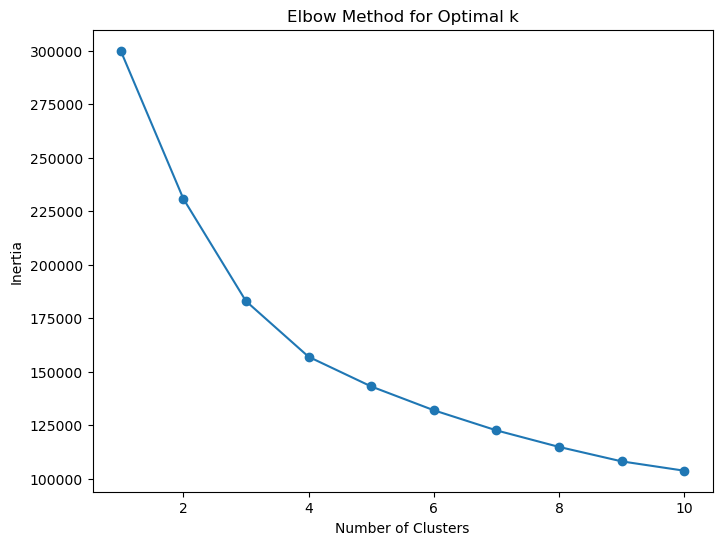

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
citi5['cluster'] = kmeans.fit_predict(features_scaled)

C:\Users\lecce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


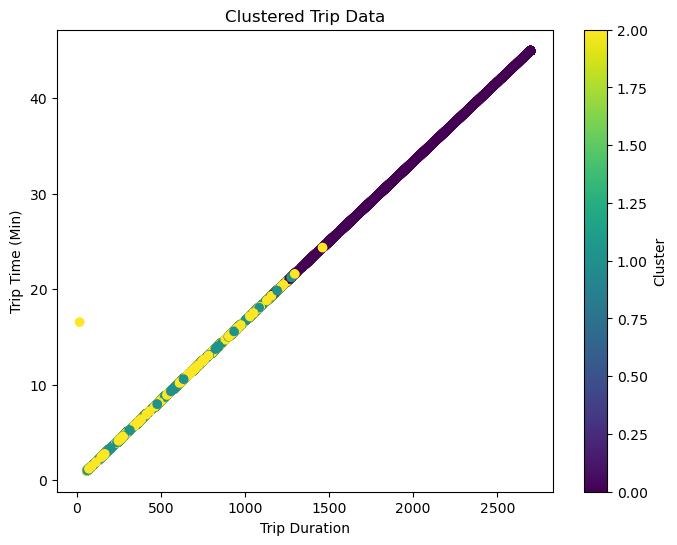

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(citi5['trip_duration'], citi5['trip_time_min'], c=citi5['cluster'], cmap='viridis')
plt.title('Clustered Trip Data')
plt.xlabel('Trip Duration')
plt.ylabel('Trip Time (Min)')
plt.colorbar(label='Cluster')
plt.show()

In [30]:
from sklearn.metrics import silhouette_score

In [33]:
features = citi5[['trip_duration', 'trip_time_min', 'start_station_latitude', 'end_station_latitude']]

In [34]:
optimal_k = 4

In [35]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
citi5['cluster'] = kmeans.fit_predict(features_scaled)

C:\Users\lecce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
silhouette = silhouette_score(features_scaled, citi5['cluster'])
print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.23874788754401893


In [41]:
citi5.shape

(50000, 20)

In [43]:
print(citi5.head())
print(citi5.info())

  trip_id  bike_id weekday  start_hour       start_time  start_station_id  \
0  LnQzQk    16013     Mon          18   9/9/2013 18:18               523   
1  IL9boN    15230     Thu          18  9/12/2013 18:38               257   
2  46clGB    17942     Wed          19  9/18/2013 19:44               479   
3  v7vdFt    19683     Sat          11  9/28/2013 11:54               527   
4  VGBsb5    18024     Sat          18   9/7/2013 18:08               521   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4          8 Ave & W 31 St               40.750450               -73.994811   

          end_time  end_station_id     end_station_name  end_s

In [45]:
citi5_numeric = citi5.select_dtypes(include=[np.number])

In [47]:
print(citi5_numeric.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bike_id                  50000 non-null  int64  
 1   start_hour               50000 non-null  int64  
 2   start_station_id         50000 non-null  int64  
 3   start_station_latitude   50000 non-null  float64
 4   start_station_longitude  50000 non-null  float64
 5   end_station_id           50000 non-null  int64  
 6   end_station_latitude     50000 non-null  float64
 7   end_station_longitude    50000 non-null  float64
 8   trip_duration            50000 non-null  float64
 9   trip_time_min            50000 non-null  float64
 10  birth_year               43021 non-null  float64
 11  gender                   50000 non-null  int64  
 12  cluster                  50000 non-null  int32  
dtypes: float64(7), int32(1), int64(5)
memory usage: 4.8 MB
None


In [51]:
features = citi5_numeric[['trip_time_min', 'start_hour']]

In [53]:
print(features.head())

   trip_time_min  start_hour
0      16.550000          18
1       9.683333          18
2       6.016667          19
3       9.350000          11
4      38.266667          18


In [55]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [57]:
print(pd.DataFrame(scaled_features, columns=features.columns).head())

   trip_time_min  start_hour
0       0.268482    0.793080
1      -0.449715    0.793080
2      -0.833219    0.998821
3      -0.484579   -0.647103
4       2.539869    0.793080


In [59]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]
score = [kmeans[i].fit(scaled_features).score(scaled_features) for i in range(len(kmeans))]

score

C:\Users\lecce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lecce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lecce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lecce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lecce\anaconda3\Lib\site-packages\sklearn\clust

[-100000.0000000001,
 -64270.854567162896,
 -35628.245899461384,
 -29016.338024588957,
 -23904.000681275942,
 -19387.56271369917,
 -17242.783191501698,
 -15395.824802273428,
 -13696.127520574282]

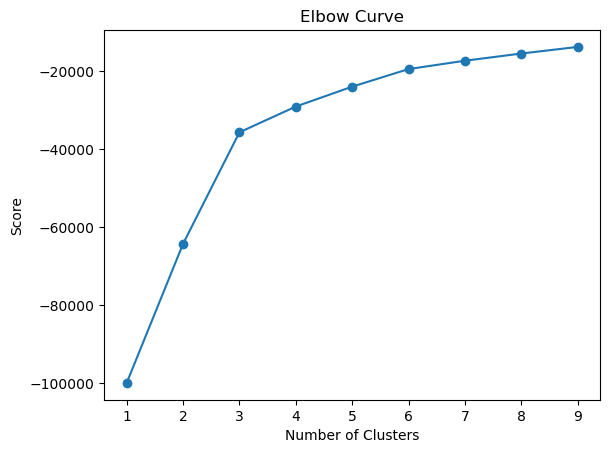

In [61]:
pl.plot(num_cl,score, marker='o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow curve plots the "score" against the number of clusters (k). The goal is to identify the "elbow point," where the curve starts to flatten, indicating diminishing returns in reducing the inertia with additional clusters.

From the chart:

The steepest drop in inertia occurs between 1 and 3 clusters, indicating that most valued information for our analysis is between 1-3.
Beyond 3 clusters, the curve starts to flatten.

In [70]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=18, n_init=10)

In [72]:
citi5_numeric['Cluster'] = kmeans.fit_predict(scaled_features)
citi5_numeric['Cluster'] = kmeans.fit_predict(scaled_features)

In [74]:
print(citi5_numeric.head())

   bike_id  start_hour  start_station_id  start_station_latitude  \
0    16013          18               523               40.754666   
1    15230          18               257               40.719392   
2    17942          19               479               40.760193   
3    19683          11               527               40.743156   
4    18024          18               521               40.750450   

   start_station_longitude  end_station_id  end_station_latitude  \
0               -73.991382             334             40.742388   
1               -74.002472             236             40.728419   
2               -73.991255             513             40.768254   
3               -73.974347             441             40.756014   
4               -73.994811             476             40.743943   

   end_station_longitude  trip_duration  trip_time_min  birth_year  gender  \
0             -73.997262          16.55      16.550000      1968.0       2   
1             -73.987140  

In [78]:
X = citi5[['start_station_latitude', 'start_station_longitude', 
        'end_station_latitude', 'end_station_longitude']]

In [80]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [84]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Change n_clusters based on your analysis
citi5['cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\lecce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


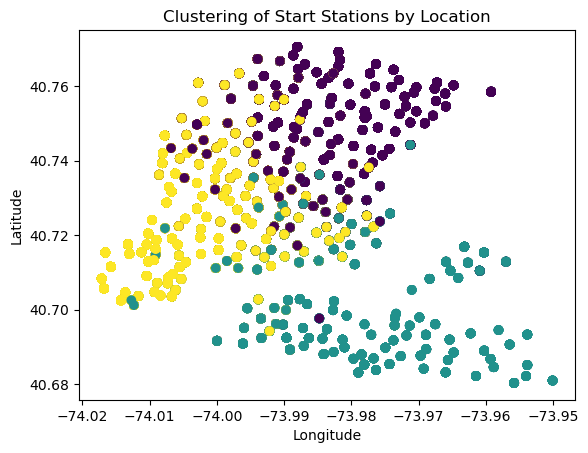

In [88]:
plt.scatter(citi5['start_station_longitude'], citi5['start_station_latitude'], c=citi5['cluster'], cmap='viridis')
plt.title('Clustering of Start Stations by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [90]:
X = citi5[['trip_duration', 'start_hour']]

In [92]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [94]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Change n_clusters based on your analysis
citi5['cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\lecce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


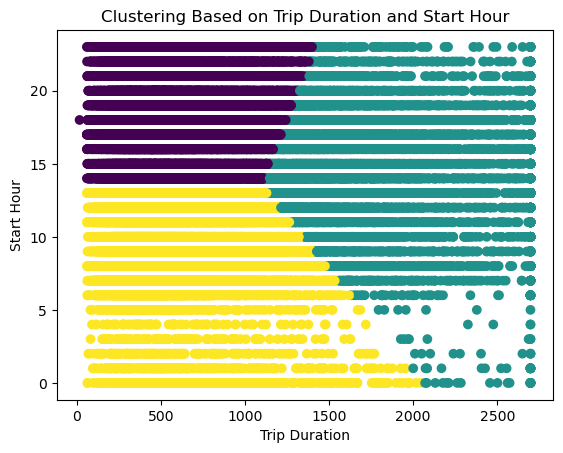

In [96]:
plt.scatter(citi5['trip_duration'], citi5['start_hour'], c=citi5['cluster'], cmap='viridis')
plt.title('Clustering Based on Trip Duration and Start Hour')
plt.xlabel('Trip Duration')
plt.ylabel('Start Hour')
plt.show()

In [98]:
X = citi5[['start_station_latitude', 'start_station_longitude', 
        'end_station_latitude', 'end_station_longitude', 'trip_duration']]

In [100]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [102]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Change n_clusters based on your analysis
citi5['cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\lecce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


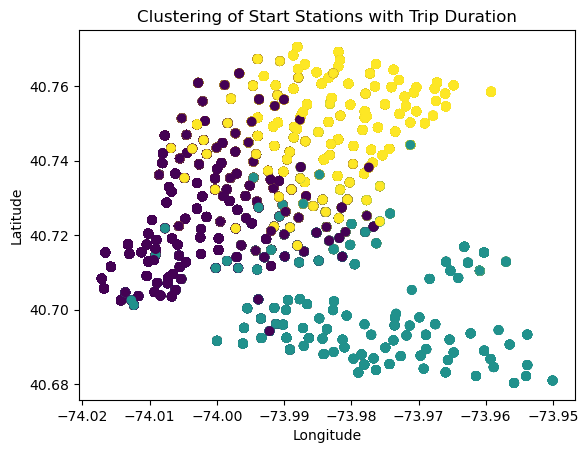

In [104]:
plt.scatter(citi5['start_station_longitude'], citi5['start_station_name'], c=citi5['cluster'], cmap='viridis')
plt.title('Clustering of Start Stations with Trip Duration')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [108]:
print(citi5)

      trip_id  bike_id weekday  start_hour       start_time  start_station_id  \
0      LnQzQk    16013     Mon          18   9/9/2013 18:18               523   
1      IL9boN    15230     Thu          18  9/12/2013 18:38               257   
2      46clGB    17942     Wed          19  9/18/2013 19:44               479   
3      v7vdFt    19683     Sat          11  9/28/2013 11:54               527   
4      VGBsb5    18024     Sat          18   9/7/2013 18:08               521   
...       ...      ...     ...         ...              ...               ...   
49995  Fb2bmC    17988     Sat          18  9/21/2013 18:39               479   
49996  XGB7JU    18458     Sat          17  9/14/2013 17:32               261   
49997  vFs2HS    15054     Sat          18   9/7/2013 18:08               402   
49998  xxacSt    16763     Sat          13   9/7/2013 13:25               271   
49999  4ZmicF    16794     Mon          21  9/23/2013 21:54               515   

            start_station_n

In [112]:
citi5_encoded = pd.get_dummies(citi5[['start_station_name', 'end_station_name']], drop_first=True)

In [114]:
X = pd.concat([citi5_encoded, citi5[['trip_duration']]], axis=1)

In [116]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [118]:
kmeans = KMeans(n_clusters=4, random_state=42)  # You can adjust n_clusters based on your analysis
citi5['cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\lecce\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


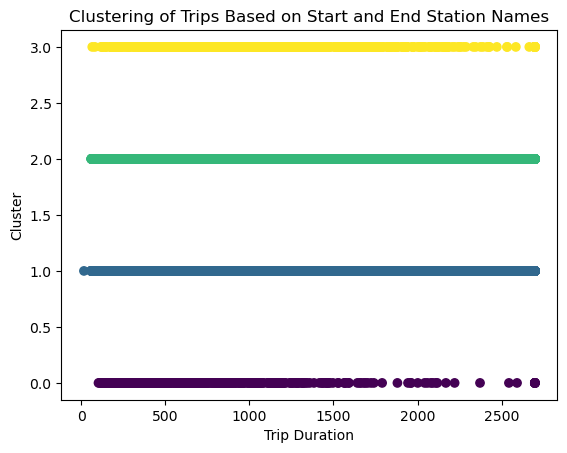

In [120]:
plt.scatter(citi5['trip_duration'], citi5['cluster'], c=citi5['cluster'], cmap='viridis')
plt.title('Clustering of Trips Based on Start and End Station Names')
plt.xlabel('Trip Duration')
plt.ylabel('Cluster')
plt.show()

The Visualisation shows 4 clusters of groups of commuters that travel with CitiBikes through NYC, 

Cluster 0 (purple): Concentrates around shorter trip durations. This cluster likely represents users making very short trips.

Cluster 1 (blue): Includes trips of slightly longer trips. These trips might represent users covering medium distances, possibly for mixed purposes (commuting or leisure).

Cluster 2 (green): Contains slightly longer-duration trips, though the range overlaps somewhat with Cluster 1.

Cluster 3 (yellow): Includes the longest trip durations, which might represent both leisure rides or unusual trips and outliers.

In [122]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

# Create a map centered around NYC
m = folium.Map(location=[40.75, -73.99], zoom_start=12)

# Add start and end stations to the map with color-coding by cluster
marker_cluster = MarkerCluster().add_to(m)
for _, row in citi5.iterrows():
    color = 'blue' if row['cluster'] == 0 else 'red' if row['cluster'] == 1 else 'green'
    folium.Marker([row['start_station_latitude'], row['start_station_longitude']],
                  popup=f"Start: {row['start_station_name']}",
                  icon=folium.Icon(color=color)).add_to(marker_cluster)
    folium.Marker([row['end_station_latitude'], row['end_station_longitude']],
                  popup=f"End: {row['end_station_name']}",
                  icon=folium.Icon(color=color)).add_to(marker_cluster)

In [124]:
m.save("stations_map.html")

In [130]:
stations = pd.concat([citi5['start_station_name'], citi5['end_station_name']]).unique()